# Boston House Price Prediction

In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
#reading the data
data = pd.read_csv(r'C:\Users\MASTER\Boston\boston.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df = data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


__Data Understanding__

__Feature Selection__

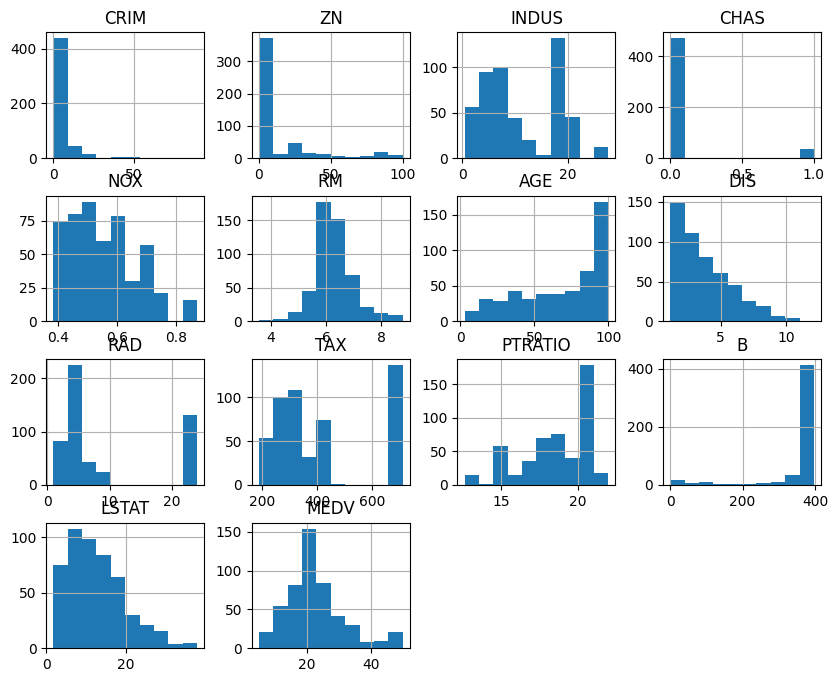

In [17]:
#distribution of values in each column
data.hist(figsize = (10,8));

Text(0.5, 1.0, 'Corellation between scores')

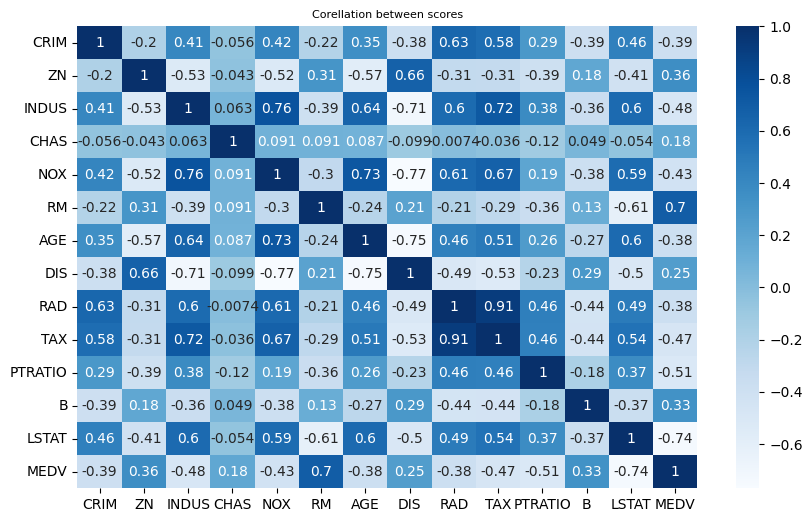

In [553]:
#checking the Pearson Correlation coefficient
plt.figure(figsize=(10,6));

sns.heatmap(data.corr(), annot = True, cmap = 'Blues')
plt.title('Corellation between scores', fontsize = 8)

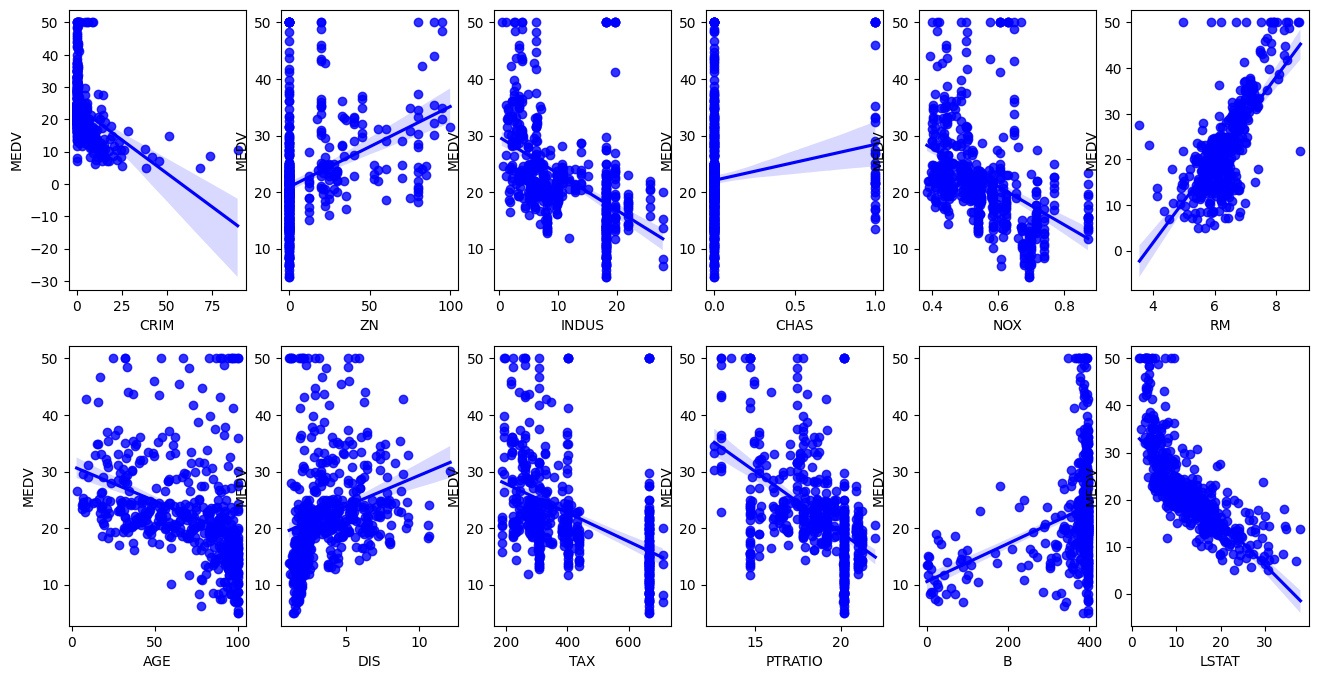

In [13]:
#scatterplot of features by target('MEDV')
fig, axs = plt.subplots(nrows = 2, ncols = 6, figsize = (16,8))
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT']
for col, ax in zip(cols, axs.flat):
    sns.regplot(x = data[col], y = data['MEDV'], color = 'blue', ax = ax)

__Modelling__ 

In [633]:
X = df.drop(['MEDV', 'RAD', 'CHAS','ZN', 'B'], axis = 1)
y = df.MEDV

In [657]:
a = np.array(X.iloc[10]).reshape(-1, 1)
a.shape

(9, 1)

In [660]:
ascaled = scaler.fit_transform(a)
ascaled.reshape(1,-1)

array([[0.00000000e+00, 2.46001361e-02, 9.62464465e-04, 1.97960191e-02,
        3.02711211e-01, 1.96985209e-02, 1.00000000e+00, 4.81863235e-02,
        6.50795683e-02]])

In [628]:
#feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [629]:
#splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [630]:
#creating an instance of RandomForestRegressor
model = RandomForestRegressor()

In [609]:
#setting parameters for and grid searching
parm = {"max_depth":[2, 3, 4, 5], "min_samples_split":[1, 3,5], "min_samples_leaf": [1, 2, 3] }
gs_model = GridSearchCV(model, parm, cv=5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 3, 5]})

In [610]:
#getting the best parameters
gs_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 1}

In [611]:
gs_model.best_score_

0.8188762314392648

In [618]:
rfr = RandomForestRegressor(max_depth=5, min_samples_split=1,min_samples_leaf=2,  n_estimators=30, random_state=42)

In [619]:
#fitting the model 
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=1,
                      n_estimators=30, random_state=42)

In [620]:
#getting the score on test data
rfr.score(X_test, y_test)

0.878310201569582

In [621]:
#getting the score on training data
rfr.score(X_train, y_train)

0.9265753501833751

In [622]:
#predicting X_test
predY = rfr.predict(X_test)

In [623]:
#getting the mean_squared_error
mse = mean_squared_error(y_test, predY)
np.sqrt(mse)

2.9873020086559188

In [328]:
#saving the model
model_name = 'price_predictor.sav'
pickle.dump(rfr, open(model_name, 'wb'))

In [580]:
model.predict(X_test)

array([23.01141525, 29.62742719, 17.85934973, 22.62529637, 15.9973981 ,
       22.08012406, 19.09380215, 15.30870428, 21.71753927, 20.61256793,
       19.16793807, 18.99492521,  9.2606559 , 22.02259345, 20.468682  ,
       24.17514286, 17.9556321 ,  9.2606559 , 45.9408978 , 14.72827393,
       23.70397441, 23.55429854, 15.0527513 , 24.38251526, 14.21924684,
       15.13369757, 20.87763434, 14.61456293, 18.82999903, 20.65025225,
       19.80686464, 23.45901715, 27.11369955, 20.36633027, 15.25538288,
       15.71148956, 33.75508785, 20.69769238, 19.77829677, 23.41660482,
       19.00217475, 27.28104389, 45.22545335, 20.58370914, 23.00820614,
       13.90626776, 15.84743193, 23.62709836, 17.49814466, 28.03645473,
       20.54818727, 33.08843853, 15.96462983, 26.03206368, 44.69822581,
       21.78502256, 15.28394337, 30.48477149, 22.94703459, 19.98798146,
       25.19262364, 33.85197785, 27.56744386, 20.01425475, 27.25340384,
       17.96164492, 12.6622447 , 23.35366333, 28.24971969, 16.42